# Загрузка и предобработка данных

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data.csv', header=None)


In [3]:
df = df.iloc[2:]

In [4]:
print(df.head(5))

             0   1      2          3            4       5   6  7  8  9   ...  \
2   3 170 000 ₽   7  5,30%  211 051 ₽    862 850 ₽   1,50% NaN  0  0  0  ...   
3     500 000 ₽  17  6,50%   39 518 ₽    289 518 ₽  10,00% NaN  0  0  0  ...   
4  11 600 897 ₽   9  4,50%  537 680 ₽  9 567 386 ₽   1,50% NaN  0  0  0  ...   
5   5 250 000 ₽  13  4,50%  233 022 ₽  2 858 022 ₽   1,50% NaN  0  0  0  ...   
6   3 000 000 ₽   8  3,75%  216 485 ₽          0 ₽   0,00% NaN  0  0  0  ...   

  19 20 21 22 23 24 25 26 27 28  
2  0  0  0  0  0  0  0  0  0  0  
3  0  0  1  1  0  0  0  0  0  0  
4  0  0  0  0  0  0  0  0  0  0  
5  0  0  0  1  0  0  1  0  0  0  
6  0  0  0  0  0  0  0  0  0  0  

[5 rows x 29 columns]


In [5]:
df = df.drop(df.columns[6], axis=1)

In [7]:
df = df.reset_index(drop=True)

,0,1,2,3,4,5,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
0,3 170 000 ₽,7,"5,30%",211 051 ₽,862 850 ₽,"1,50%",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,500 000 ₽,17,"6,50%",39 518 ₽,289 518 ₽,"10,00%",0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2,11 600 897 ₽,9,"4,50%",537 680 ₽,9 567 386 ₽,"1,50%",0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,5 250 000 ₽,13,"4,50%",233 022 ₽,2 858 022 ₽,"1,50%",0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,3 000 000 ₽,8,"3,75%",216 485 ₽,0 ₽,"0,00%",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
def process_cell(cell):
    # Удаление неразрывающихся пробелов и замена запятой на точку
    cell = cell.replace('\xa0', '').replace(',', '.')
    return cell

In [9]:
df[0] = df[0].str.replace(' ', '').str.replace('₽', '').str.replace(',', '.')
# Применение функции к столбцу 'Сумма'
df[0] = df[0].apply(process_cell)

# Преобразование столбца в числовой формат (float)
df[0] = df[0].astype(float)
df[2] = df[2].str.replace(',', '').str.replace('%', '')
df[2] = df[2].astype(float) / 100
df[3] = df[3].str.replace(' ', '').str.replace('₽', '').str.replace(',', '.')
# Применение функции к столбцу 'Сумма'
df[3] = df[3].apply(process_cell)

# Преобразование столбца в числовой формат (float)
df[3] = df[3].astype(float)
df[4] = df[4].str.replace(' ', '').str.replace('₽', '').str.replace(',', '.')
# Применение функции к столбцу 'Сумма'
df[4] = df[4].apply(process_cell)

# Преобразование столбца в числовой формат (float)
df[4] = df[4].astype(float)
df[5] = df[5].str.replace(',', '').str.replace('%', '')
df[5] = df[5].astype(float) / 100

In [10]:
df[0] = df[0].replace('\xa0', '')

# Корреляционный анализ параметров займа

In [11]:
correlation_matrix = df.corr()

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
%matplotlib inline

In [192]:
df_corr = df.iloc[:, :6]

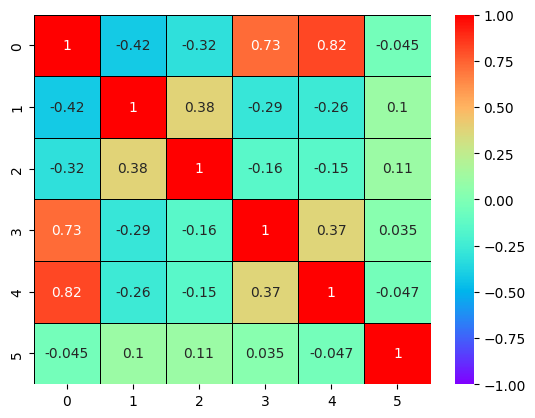

In [193]:
sns.heatmap(df_corr.corr(), annot=True, linewidths=0.5, linecolor='black', cmap='rainbow', vmin=-1, vmax=1)
plt.show()

# Из матрицы корреляций видим что существует сильная зависимость между суммой на которую выдали займ и неоплаченной его частью, а также между выданной суммой и заработанной суммой. Также существует положительная корреляция между комиссией и рейтингом. Отрицательная корреляция, пусть и не очень выделюящаяся есть между суммой займа и рейтингом, а также между суммой займа и процентом комиссии

Сильная зависимость между суммой выдачи займа и неоплаченной его частью: Положительная корреляция между суммой выдачи займа и неоплаченной частью указывает на то, что чем больше сумма выдачи займа, тем больше сумма, которую клиенты не возвращают. Это может быть связано с тем, что более крупные займы могут иметь больший риск невозврата.

Сильная зависимость между суммой выдачи займа и заработанной суммойП положительная корреляция между суммой выдачи займа и заработанной суммой указывает на то, что более крупные займы могут приносить больше прибыли. Однако это также может увеличить риски.

Положительная корреляция между комиссией и рейтингом: Это может означать, что клиенты с более высоким рейтингом могут соглашаться на более высокие проценты комиссии. Это может быть связано с более высокой уверенностью кредитора в возможности таких клиентов вернуть займ.

Отрицательная корреляция между суммой займа и рейтингом: Отрицательная корреляция может указывать на то, что клиенты с более низким рейтингом могут чаще запрашивать более крупные займы. Возможно, кредиторы предоставляют более низкие суммы тем, у кого есть более высокий рейтинг из-за рисков, связанных с клиентами с низким рейтингом.

Отрицательная корреляция между суммой займа и процентом комиссии: Отрицательная корреляция может указывать на то, что клиенты, запрашивающие более крупные займы, могут получать более низкий процент комиссии. Это может быть стратегией для привлечения клиентов к более крупным займам.

In [14]:
from sklearn.feature_selection import RFE

# Расчет целевой переменной для каждой строки

In [15]:
el_amount = df[5]*df[0]/100
comission_amount = df[0]*df[2]/100

In [16]:
loss = df[4]*el_amount
inv_prof = df[3] - loss
profit = inv_prof + comission_amount
profit_in_proc = (profit/df[0])*100

In [18]:
result_df = pd.concat([df, profit_in_proc], axis=1)

In [19]:
data = []
for i in range(result_df[1].size):
    data.append(0)

In [20]:
result_df = pd.concat([result_df, pd.DataFrame(data)], axis = 1)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [22]:
result_df.rename(columns = { 10 : 9}, inplace = True )

In [23]:
result_df.columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29']

In [24]:
result_df.loc[pd.to_numeric(result_df['28']) > 0, '29'] = 1

In [25]:
result_df = result_df.iloc[:, :30]

In [70]:
%matplotlib qt

# Итоговый корреляционный анализ для всех признаков

In [71]:
sns.heatmap(result_df.corr(), annot=True, linewidths=0.5, linecolor='black', cmap='rainbow', vmin=-1, vmax=1)
plt.show()

# Регрессионный анализ для всех признаков

In [27]:
X = result_df.drop("29", axis=1)  # Факторы
y = result_df["29"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [30]:
y_pred_proba = model.predict_proba(X_test)[:, 1]

threshold = 0.5

y_pred = (y_pred_proba > threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"ROC-AUC: {roc_auc}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 1.0
ROC-AUC: 1.0
Confusion Matrix:
[[92  0]
 [ 0 15]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00        15

    accuracy                           1.00       107
   macro avg       1.00      1.00      1.00       107
weighted avg       1.00      1.00      1.00       107



In [31]:
feature_importance = model.coef_[0]

In [32]:
print(feature_importance)

[ 7.25601135e-05 -1.37790991e-08 -1.03661621e-08 -3.19416748e-04
 -5.49476984e-05  1.00197328e-08 -9.67434753e-11 -9.30525652e-11
 -1.20396233e-10  6.36393507e-11 -1.60378491e-10  8.53891074e-10
 -1.86266958e-11 -7.39582024e-10 -3.75851846e-10  2.87320693e-10
  4.31746727e-10 -1.92323907e-10  1.72351855e-10 -9.38399022e-12
  4.27840044e-10 -1.80248897e-10 -8.12687789e-11 -7.09510919e-10
  1.06140364e-10 -7.57210895e-10 -1.81824244e-11 -6.48593136e-11
  4.09250603e-04]


# Проанализируем важность признаков для целевой переменной(прибыли)

Положительно влияет на целевую переменную такие признаки как: 
Сумма займа(чем выше, тем больше прибыль, но риски тоже повышаются); 
Ожидаемые потери(чем ниже, тем больше прибыль); 
Была ли в компании смена учредителя(если нет то прибыль чаще выше); 
Первое ли это ЮР(если да, то прибыль чаще ниже);
Имеет ли компания информацию об объеме своей выручки(если да, то прибыль чаще выше); 
Знает ли о ФОТ(если да, то прибыль выше); 
Знает ли клиент наценку(рентабельность, прибыль)(если да то прибыль выше); 
Релевантный ли опыт работы(если да прибыль чаще выше);
Еслть ли у клиента не оформленный официально партнер(если есть то прибыль чаще ниже).

# Регрессионный анализ для факторов

In [73]:
x = X.iloc[:, 6:]
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.2, random_state=42)
model1 = LogisticRegression()
model1.fit(x_train1, y_train1)

LogisticRegression()

In [74]:
y_pred_proba = model1.predict_proba(x_test1)[:, 1]

threshold = 0.5

y_pred = (y_pred_proba > threshold).astype(int)

accuracy = accuracy_score(y_test1, y_pred)
roc_auc = roc_auc_score(y_test1, y_pred_proba)
conf_matrix = confusion_matrix(y_test1, y_pred)
class_report = classification_report(y_test1, y_pred)

print(f"Accuracy: {accuracy}")
print(f"ROC-AUC: {roc_auc}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 1.0
ROC-AUC: 1.0
Confusion Matrix:
[[92  0]
 [ 0 15]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00        15

    accuracy                           1.00       107
   macro avg       1.00      1.00      1.00       107
weighted avg       1.00      1.00      1.00       107



In [77]:
feature_importance = model1.coef_[0]
print(feature_importance)

[-1.71315874e-14 -9.07830267e-06  1.78154925e-06 -1.78099346e-05
  1.01832695e-05 -1.87564653e-05 -1.58528320e-05  2.97055692e-05
 -7.01989531e-06 -1.08268740e-05 -2.74270519e-05  3.08892205e-06
 -9.07830269e-06  2.16046520e-14  3.74916551e-05  2.34618455e-05
  6.61614938e-07 -3.78193531e-06 -1.13567097e-05 -2.99569922e-06
  7.56162790e-15  1.07976135e-14  5.40367688e-04]


Увидим что наиболее важные признаки : 
Заемщик от партнера и был подготовлен к ВИ. 
Офис находится в здании партнера/друга/родственника, аренду не платит. 
Не потребовалось денег для начала бизнеса, тк были договоренности с поставщиками. 
Нелогичный выбор сферы бизнеса. 
Нерелевантный опыт работы. Не знает кредиторов ), в тч объем обязательств. 
Не знает наценку (рентабельность, прибыль). 
Не знает ФОТ. Выручка компании в первый год > 30 млн. 
В компании была смена учредителя

# Ранжируем факторы

In [78]:
from sklearn.feature_selection import RFE

rfe = RFE(model1, n_features_to_select=1)
rfe.fit(x_train1, y_train1)
feature_ranking = rfe.ranking_
print(feature_ranking)

[21 14 18  5 10 12  7 13  4  9 11 15 16 20  6  2 19 17  3  8 23 22  1]


Увидим что наибольшее влияние на целевую переменную оказывают теже самые факторы что и при анализе важности признаков

# Ранжируем признаки

In [65]:
from sklearn.feature_selection import RFE

rfe = RFE(model, n_features_to_select=1)
rfe.fit(X_train, y_train)
feature_ranking = rfe.ranking_

In [66]:
print(feature_ranking)

[ 3  5  6  2  4  7 22 23 20 26 19  8 27 10 14 15 12 16 18 29 13 17 24 11
 21  9 28 25  1]


Увидим, что наибольшее влияние на регрессанта оказывает влияне следующее: заработанная сумма, сумма займа, невыплаченная сумма, рейтинг, комиссия, ожидаемые потери, является ли компания первым ЮЛ, есть ли официально неоформленный "партнер", основано ли текущее ЮЛ до 30 лет.

In [53]:
import shap

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


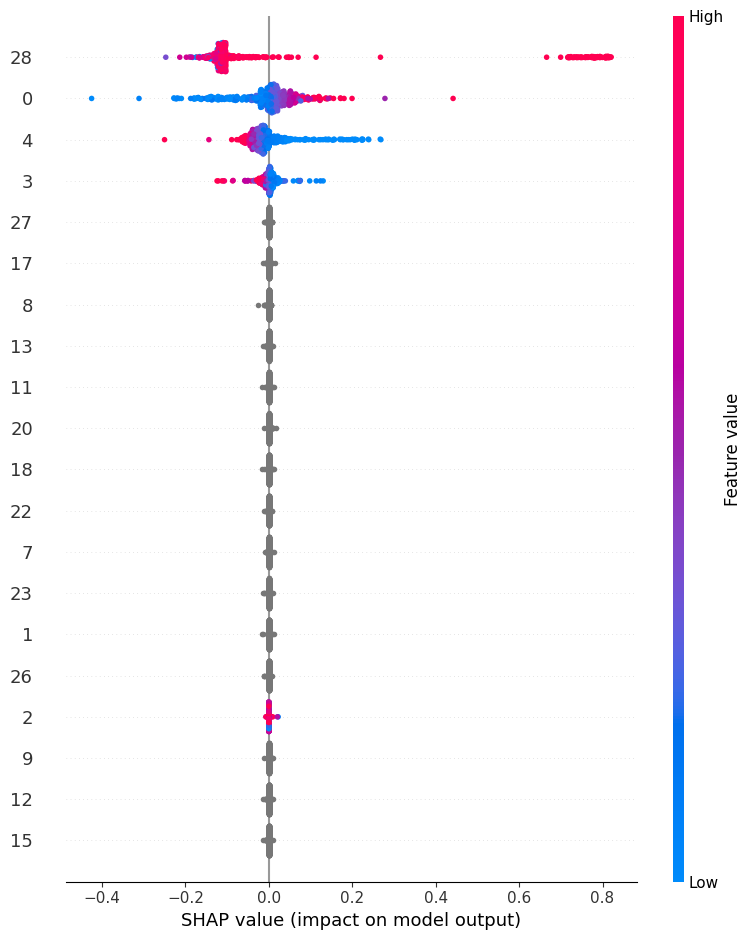

In [64]:
explainer = shap.KernelExplainer(model.predict, X)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)

Из графика видим, что существенное влияние на модель оказывает значение прибыли, сумма займа(даже при большой сумме, влияние на прибыль бывает отрицательным, что говорит о рисках), невыплаченная часть займа(чем ниже невыплаченная сумма, тем обычно больше прибыль), заработанная сумма(в целом сильно коррелирует с суммой займа, поэтому даже при большом значении, прибыль может оказаться отрицательной), а также небольшое влияние оказывает комиссия.

In [ ]:
explainer = shap.KernelExplainer(model1.predict, x)
shap_values = explainer.shap_values(x)
shap.summary_plot(shap_values, x)

# Из проведенного регрессионного анализа видим, что наиболее важными признаками для изменения, с целью получения прибыли являются : заработанная сумма, сумма займа, невыплаченная сумма, рейтинг, комиссия, ожидаемые потери, есть ли официально неоформленный "партнер", основано ли текущее ЮЛ до 30 лет. Различные подходы дают немного разные результаты, по тому, насколько признак является важным, но при этом все выделяют одни и теже признаки. Также видим, что наибольшее влияние все-таки оказывает информация о займе, нежели факторы из таблицы. Если не учитывать информацию о займах, то наибольшее влияние оказывают следующие факторы : Заемщик от партнера и был подготовлен к ВИ. Офис находится в здании партнера/друга/родственника, аренду не платит. Не потребовалось денег для начала бизнеса, тк были договоренности с поставщиками. Нелогичный выбор сферы бизнеса. Нерелевантный опыт работы. Не знает кредиторов ), в тч объем обязательств. Не знает наценку (рентабельность, прибыль). Не знает ФОТ. Выручка компании в первый год > 30 млн. В компании была смена учредителя